# Step 1: Read the data, perform primary analysis and data cleanup
## Download the data from sklearn and study their structure. For this:

- Let's look at the general information about the data.
- Let's check for missing values.
- Let's study the target feature (malignant or benign tumor).

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

print("First line data:")
print(df.head())

print("\nInformation about data:")
print(df.info())

print("\nThe number of missing values:")
print(df.isnull().sum())

print("\nThe distribution of classes in the target feature:")
print(df['target'].value_counts())

First line data:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area 

# Step 2: Exploratory Data Analysis (EDA)
## We will do it:

- Visualization of the class distribution.
- Building distributions for several key features.
- Feature correlation analysis.

C:\Users\denis\AppData\Local\Temp\ipykernel_14272\3327515221.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='Set2')


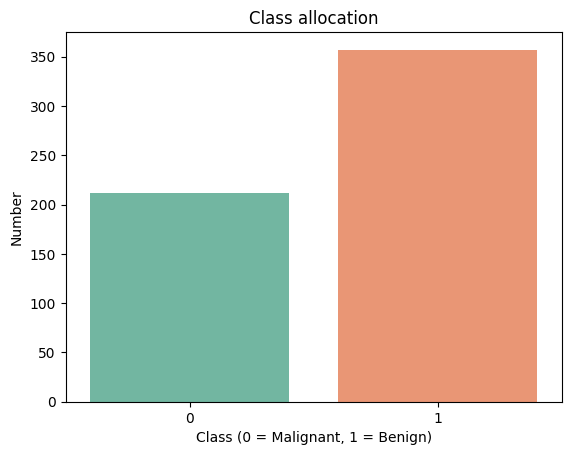

In [2]:
sns.countplot(x='target', data=df, palette='Set2')
plt.title("Class allocation")
plt.xlabel("Class (0 = Malignant, 1 = Benign)")
plt.ylabel("Number")
plt.show()

# Class allocation:
## There is a slight class imbalance in the target feature:

- Class 1 (benign tumor) is more common than class 0 (malignant tumor).
However, the imbalance is not critical, and the basic models will be able to cope with it without using special balancing methods.

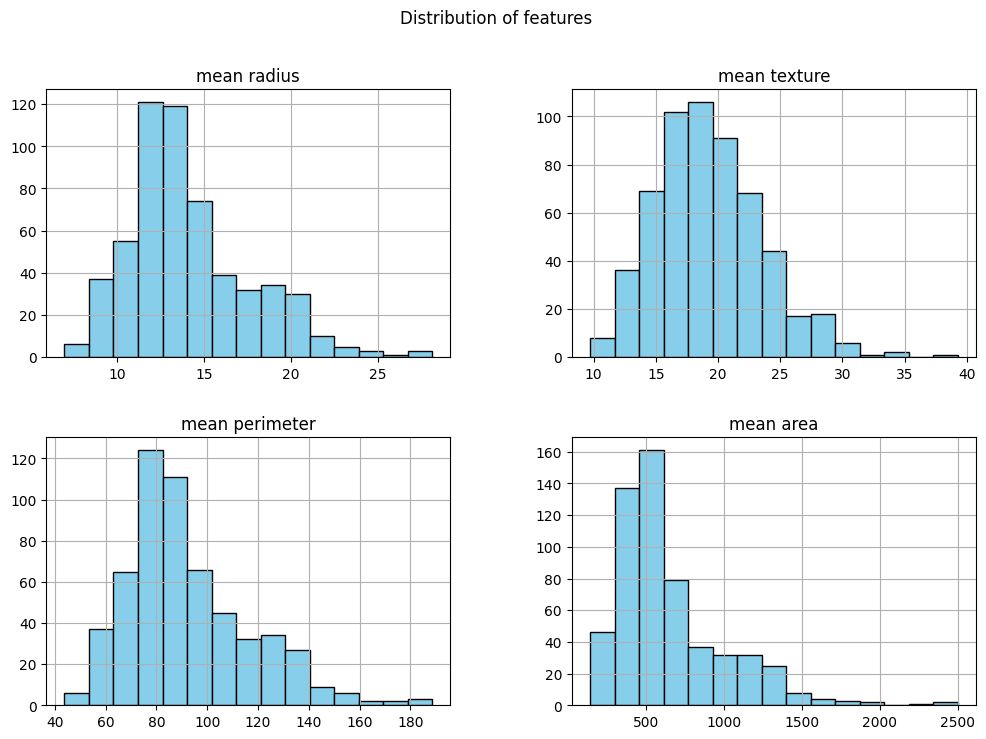

In [3]:
features_to_plot = ['mean radius', 'mean texture', 'mean perimeter', 'mean area']
df[features_to_plot].hist(bins=15, figsize=(12, 8), layout=(2, 2), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of features")
plt.show()

# Distribution of features:

- mean radius, mean perimeter, and mean area have a skewed distribution (right-sided skew). This indicates the presence of objects with extremely high values of these features, which may be outliers.
- The mean texture distribution is more symmetrical, close to normal, which can be useful for algorithms sensitive to data distribution.
# Comparison of densities:

- Signs such as mean perimeter and mean area have wide ranges of values, indicating significant variability in tumor sizes.
- High values of mean radius, mean perimeter, and mean area can be potential indicators of a malignant tumor, since large tumor sizes are often associated with an increased likelihood of malignancy.
# The need for normalization:

- All the considered features are at different scales (for example, the mean area reaches values of about 2500, while the mean texture is limited to values of about 10-40). This makes data normalization important, especially for models such as the nearest neighbor method (KNN) and the support vector Machine (SVM), which are sensitive to feature scale.

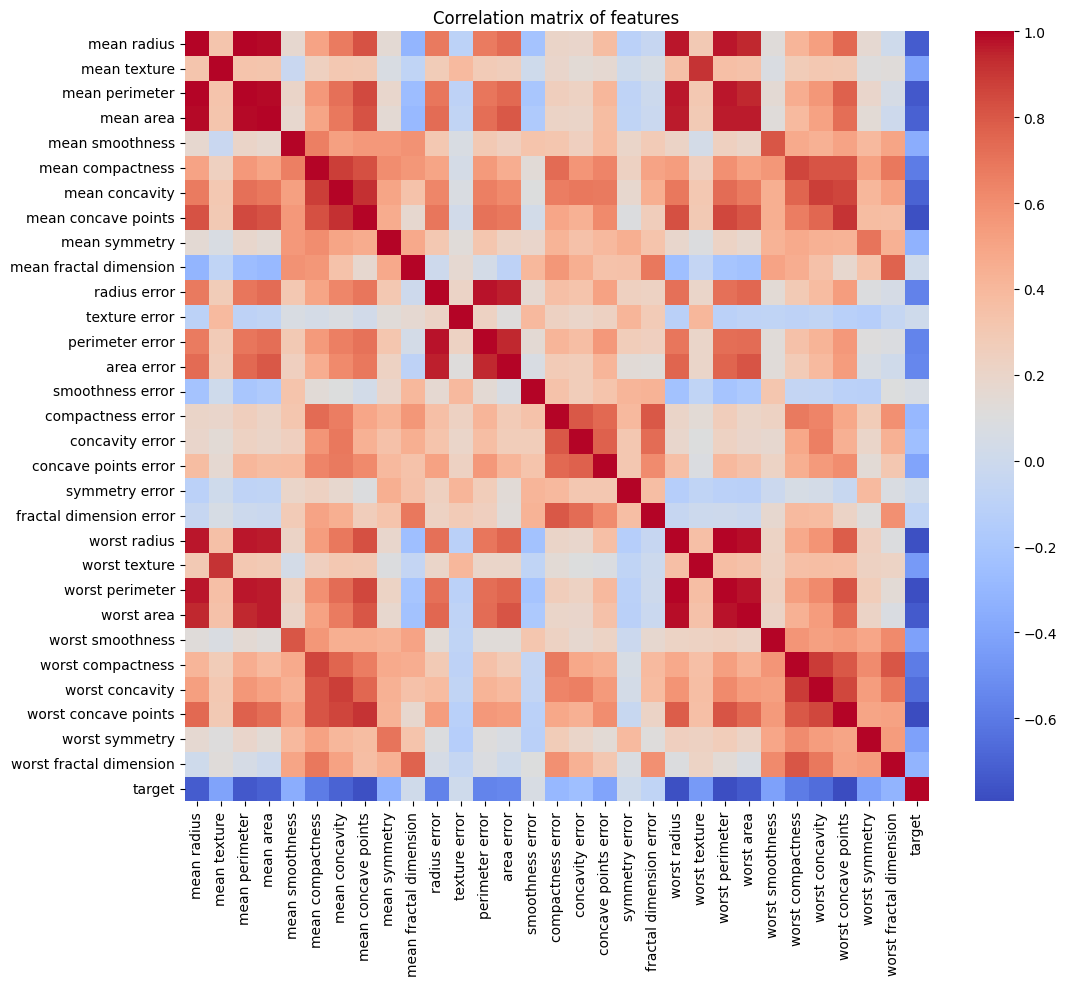

In [4]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Correlation matrix of features")
plt.show()

# Correlation of features:

- Some features are strongly correlated with each other (for example, mean radius, mean perimeter and mean area have a high mutual correlation).
This indicates the potential redundancy of the data, which can be taken into account when using dimensionality reduction methods such as PCA (Principal Component Analysis).

# Step 3: Data Transformation and Processing (Feature Engineering)
## We will do:

- We normalize the numerical features to improve the convergence of the models.
- Let's check the class balance, if necessary, apply balancing methods (for example, oversampling/undersampling).

In [5]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Selection of hyperparameters, training of models and comparison of results
## We will train 4 classifiers:

- Logistic regression.
- The nearest neighbor method.
- Random forest.
- The method of support vectors.
We use cross-validation to evaluate the quality of the models. Then we will build a confusion matrix for each model.

--- Logistic Regression ---
Accuracy: 0.9883

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        64
           1       0.99      0.99      0.99       107

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171


Confusion Matrix:


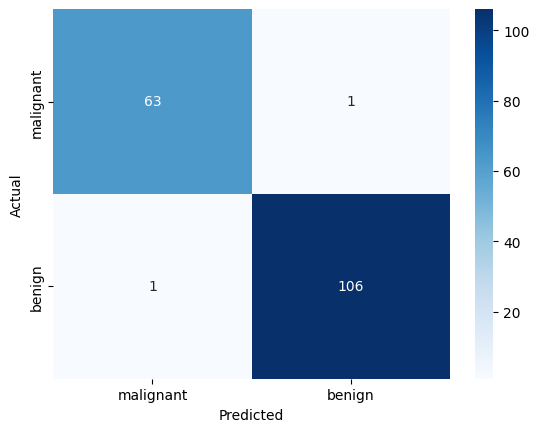

--- K-Nearest Neighbors ---
Accuracy: 0.9591

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        64
           1       0.94      1.00      0.97       107

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171


Confusion Matrix:


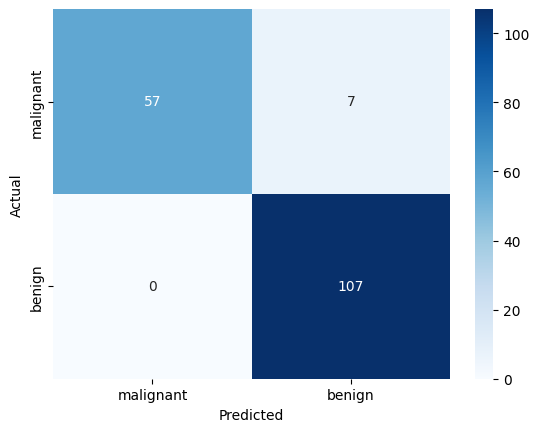

--- Random Forest ---
Accuracy: 0.9357

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91        64
           1       0.94      0.95      0.95       107

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171


Confusion Matrix:


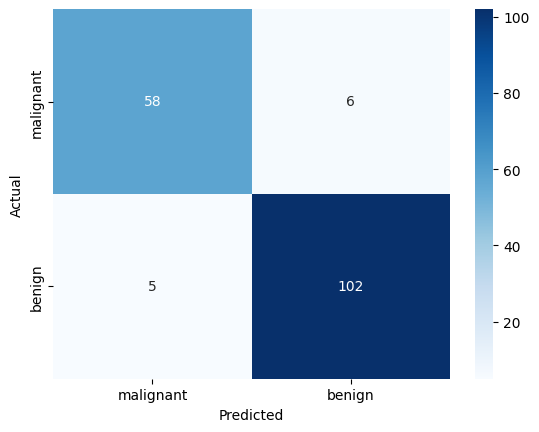

--- Support Vector Machine ---
Accuracy: 0.9766

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        64
           1       0.98      0.98      0.98       107

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171


Confusion Matrix:


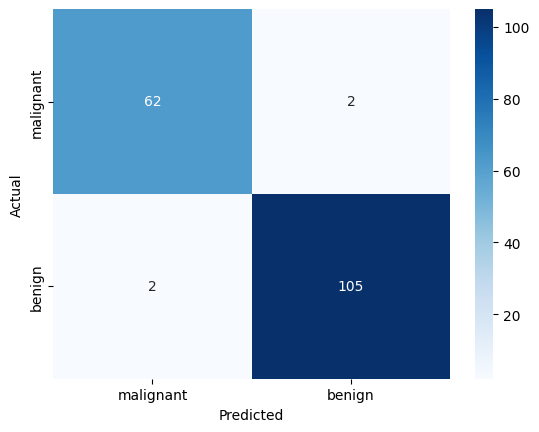

In [6]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC()
}

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

for name, model in models.items():
    print(f"--- {name} ---")
    evaluate_model(model, X_train, y_train, X_test, y_test)

# Based on the presented Accuracy values for different classification models, the following conclusions can be drawn:

## Logistic Regression:

- Logistic regression showed the highest accuracy among all models — 0.9883 (98.83%).
- This suggests that the linear relationship between the features and the target class describes the data quite well.
- This result confirms that logistic regression is a suitable model for this dataset, given its interpretability and relatively low complexity.

## The k-Nearest Neighbors method:

- The accuracy of KNN was 0.9591 (95.91%), which is lower than that of logistic regression.
- This may be due to the fact that the KNN method is sensitive to the choice of hyperparameter k, as well as to the scale of the data, which makes it less stable on this dataset.
- Nevertheless, the result is still quite high, which indicates a good classification ability of the model.

## Random Forest:

- The random forest showed an accuracy of 0.9357 (93.57%), which is lower than other models.
- This may be due to hyperparameters of a random forest, such as the number of trees or their depth. When optimizing hyperparameters, it is possible to improve the quality of the model.
- A random forest, despite its lower accuracy, has the advantage of being resistant to outliers and allows you to assess the importance of features.

## Support Vector Machine Method:

- SVM showed a high accuracy of 0.9766 (97.66%), second only to logistic regression.
- This suggests that the separating hyperplane constructed by the support vector machine classifies the data well. The method turned out to be less sensitive to the distribution of signs after normalization.
- SVM is suitable for a given dataset, especially if minimizing classification errors is required.
----

# Overall conclusion:
- All models showed high accuracy (>93%), which indicates that the data are well suited for solving the classification problem.
- Logistic regression has proven to be the best model in terms of accuracy, and because of its simplicity and interpretability, it is the preferred choice.
- The Support Vector Machine (SVM) and K-Nearest Neighbors have also shown high accuracy and are competitive options.
- The random forest, although having the lowest accuracy, can be improved by carefully adjusting the hyperparameters.

Based on confusion matrices, you can evaluate which model is better able to meet the key requirements of the task:

If it is more important to minimize FN (errors of omission of malignant tumors), the best model will be the one with the minimum number of missed cases.
If it is important to reduce FP (to avoid false alarms), then a model with minimal false alarms will be preferable.
For a medical task, it is recommended to choose a model with a low FN, since missed malignant tumors pose a greater risk - this is the k-Nearest Neighbors method

----
# Based on confusion matrices, you can evaluate which model is better able to meet the key requirements of the task:

- If it is more important to minimize FN (errors of omission of malignant tumors), the best model will be the one with the minimum number of missed cases.
- If it is important to reduce FP (to avoid false alarms), then a model with minimal false alarms will be preferable.
- For a medical task, it is recommended to choose a model with a low FN, since missed malignant tumors pose a greater risk - this is the k-Nearest Neighbors method